In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df=pd.read_csv('/home/gautam/Desktop/Internship/BigMart-Sales-Analysis-and-Prediction-Using-Product-Outlet-Sales-Data/Bigmart_Sales_Dataset/Train.csv')
test_df=pd.read_csv('/home/gautam/Desktop/Internship/BigMart-Sales-Analysis-and-Prediction-Using-Product-Outlet-Sales-Data/Bigmart_Sales_Dataset/Test.csv')

In [194]:
train_df.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [195]:
test_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [196]:
train_df.shape

(8523, 12)

In [197]:
test_df.shape

(5681, 11)

In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [199]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [200]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [201]:
meanw=train_df["Item_Weight"].mean()
print(meanw)
train_df["Item_Weight"].replace(np.nan,meanw,inplace=True)


train_df["Outlet_Size"].replace(np.nan,"small",inplace=True)

12.857645184135976


In [202]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [203]:
duplicate=train_df.duplicated()
print(duplicate.sum())
train_df['duplicate'] = duplicate

print(train_df["duplicate"])

0
0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: duplicate, Length: 8523, dtype: bool


In [204]:
train_df.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,duplicate
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,False
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,False
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,False
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,small,Tier 3,Grocery Store,732.3800,False
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,False
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,False


In [205]:

distinct=train_df["Item_Fat_Content"].unique()
print(distinct)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [206]:
train_df["Item_Fat_Content"].replace(['Low Fat','LF','low fat'],0,inplace=True)
train_df["Item_Fat_Content"].replace(['reg','Regular'],1,inplace=True)

In [207]:
dis=train_df['Item_Type'].value_counts()
print(dis)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [208]:

dis=train_df['Outlet_Size'].value_counts()
print(dis)


Medium    2793
small     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [209]:
train_df["Item_Fat_Content"].replace('small', 'Small', inplace=True)


dis=train_df['Outlet_Size'].value_counts()
print(dis)


Medium    2793
small     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [210]:
dis=train_df['Outlet_Location_Type'].value_counts()
print(dis)


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [211]:
dis=train_df['Outlet_Type'].value_counts()
print(dis)



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [212]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,duplicate
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,False
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,False
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,False
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,small,Tier 3,Grocery Store,732.3800,False
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,False


In [213]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# nominal_features = ['Item_Type', 'Outlet_Identifier', 'Outlet_Type']
# ordinal_features = ['Outlet_Size','Outlet_Location_Type']
# numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Fat_Content']

# # Define the ordinal mapping (if applicable)
# # For example, if 'Outlet_Size' has a natural order like 'Small', 'Medium', 'High', you can define it
# ordinal_categories = [
#     ['Tier1','Tier2','Tier3'], 
#     ['Small', 'Medium', 'High']  # Order for 'Outlet_Size'
# ]

# # Define the transformers for each type of feature
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# nominal_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# ordinal_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ordinal', OrdinalEncoder(categories=ordinal_categories))
# ])

# # Combine the transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('nom', nominal_transformer, nominal_features),
#         ('ord', ordinal_transformer, ordinal_features)
#     ],
#         remainder='passthrough'

# )

numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Define the preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [214]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,duplicate
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,False
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,False
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,False
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,small,Tier 3,Grocery Store,732.3800,False
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,False


Training Set Mean Squared Error:  1038569.7658362346
Training Set R-Squared:  0.643323706845252
Y-intercept:  1930.2824330132196
Coefficients:  [ -11.71908331  -19.66544       3.04405368 ...  356.4829349  -181.85240063
  680.4774325 ]


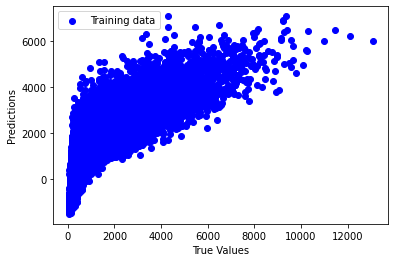

In [216]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt


# # Define feature matrices and target vectors for training data
# X_train = train_df.drop(['Item_Outlet_Sales', 'duplicate'], axis=1)
# y_train = train_df['Item_Outlet_Sales']

# # Ensure the test data doesn't contain the target variable for feature matrix
# X_test = test_df
# y_test = None

# # Initialize and train the Linear Regression model
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predict on the training data
# train_pred = regressor.predict(X_train)

# # Predict on the test data
# test_pred = regressor.predict(X_test)

# # Calculate metrics
# train_mse = mean_squared_error(y_train, train_pred)
# train_r2 = r2_score(y_train, train_pred)
# test_mse = mean_squared_error(y_test, test_pred)
# test_r2 = r2_score(y_test, test_pred)

# # Results for the training set
# print("Training Set Mean Squared Error: ", train_mse)
# print("Training Set R-Squared: ", train_r2)

# # Results for the test set
# print("Test Set Mean Squared Error: ", test_mse)
# print("Test Set R-Squared: ", test_r2)

# # Model parameters
# print("Y-intercept: ", regressor.intercept_)
# print("Coefficients: ", regressor.coef_)

# # Plotting the results
# plt.scatter(y_train, train_pred, color='blue', label='Training data')
# plt.scatter(y_test, test_pred, color='red', label='Test data')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.legend()
# plt.show()

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming train_df and test_df are already loaded DataFrames

# Define the feature columns
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Define the preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Separate features and target variable from training data
X_train = train_df.drop(['Item_Outlet_Sales', 'duplicate'], axis=1)
y_train = train_df['Item_Outlet_Sales']

# If the test data includes the target variable, separate it; otherwise, only use features
if 'Item_Outlet_Sales' in test_df.columns:
    X_test = test_df.drop(['Item_Outlet_Sales', 'duplicate'], axis=1)
    y_test = test_df['Item_Outlet_Sales']
else:
    X_test = test_df
    y_test = None

# Create and train the Linear Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Predict on the training data
train_pred = model.predict(X_train)

# Predict on the test data
test_pred = model.predict(X_test)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Print training set results
print("Training Set Mean Squared Error: ", train_mse)
print("Training Set R-Squared: ", train_r2)

# If y_test exists, calculate and print test set results
if y_test is not None:
    test_mse = mean_squared_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    print("Test Set Mean Squared Error: ", test_mse)
    print("Test Set R-Squared: ", test_r2)

# Model parameters
print("Y-intercept: ", model.named_steps['regressor'].intercept_)
print("Coefficients: ", model.named_steps['regressor'].coef_)

# Plotting the results for the training set
plt.scatter(y_train, train_pred, color='blue', label='Training data')
if y_test is not None:
    plt.scatter(y_test, test_pred, color='red', label='Test data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()
